In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\feldm\Documents\GitHub\real-estate-price-prediction\data\processed_model.csv")
df.drop("Unnamed: 0", inplace=True,axis=1)

df = pd.get_dummies(df, columns = ['provinces'],drop_first=True)
df = pd.get_dummies(df, columns = ['Type_property'],drop_first=True)
df = pd.get_dummies(df, columns = ['building_state'],drop_first=True)


df.head()

,Price,Number_bedrooms,Living_area,fully_equipped_kitchen,Furnished,terrace,garden,facades_number,Swimming_pool,fire_place,...,Type_property_penthouse,Type_property_service-flat,Type_property_town-house,Type_property_triplex,Type_property_villa,building_state_Good,building_state_Just renovated,building_state_To be done up,building_state_To renovate,building_state_To restore
0,185000,4.0,226,1,0,0,0,3,0.0,0,...,0,0,0,0,0,0,0,1,0,0
1,295000,6.0,229,1,0,0,0,4,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,150000,1.0,48,0,0,0,0,4,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,380000,4.0,180,1,0,0,0,4,0.0,0,...,0,0,0,0,1,0,0,0,0,0
4,250000,5.0,190,1,0,0,0,4,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

enc = LabelEncoder()
scaler = StandardScaler()

y = df["Price"].values.reshape(-1,1)
X = df.drop("Price",axis=1).values

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=20)

steps=[("scale", StandardScaler()),
       ("model", LinearRegression())]

pipe = Pipeline(steps)
pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(pipe.score(X_train,y_train))
print(pipe.score(X_test, y_test))
print(y_pred)

0.5828340241237935
0.6009108746770249
[[387826.79437617]
 [500377.27817608]
 [466666.14385437]
 ...
 [570556.09281094]
 [279033.02951698]
 [343163.00765669]]


[359919.1724059  442592.8061547  274538.64199069 ... 197716.14461312
 342296.96182542 335726.36583228]
0.5976207883861957
0.5976207883861957


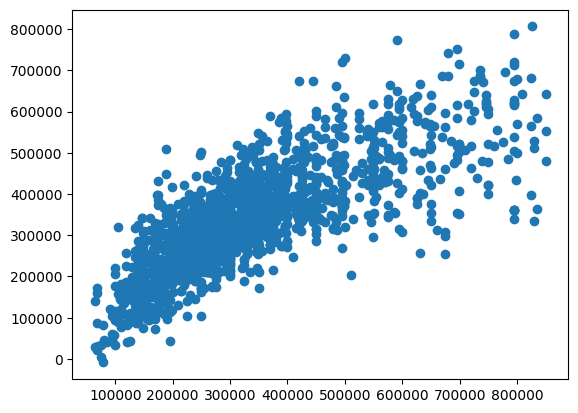

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

enc = LabelEncoder()
scaler = StandardScaler()

y = df["Price"].values.reshape(-1,1)
X = df.drop("Price",axis=1).values

X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=78)

ridge = Lasso()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))
print(ridge.score(X_test,y_test))

plt.scatter(y_test,y_pred)
plt.show()